# Predictor and Generator for Audio Signals using Machine Learning
## Basic Research Project
### Student Name: Prachi Sharma
### Professor Supervisor: Prof. Gerald Schuller
### Research Assistant Supervisor: Renato de C. R. Profeta

In [46]:
# Importing necessary modules.

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt         
import sys
import pickle
import librosa
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from sklearn.preprocessing import normalize

In [47]:
# Choosing one file from our dataset, that we already have as a numpy array.

a = np.load('/Users/DELL/Updated_binder_enviro/all-samples/cello/cello_A2_1_forte_arco-normal.npy')
sr = 44100    
print(a)
print(type(a))

[0. 0. 0. ... 0. 0. 0.]
<class 'numpy.ndarray'>


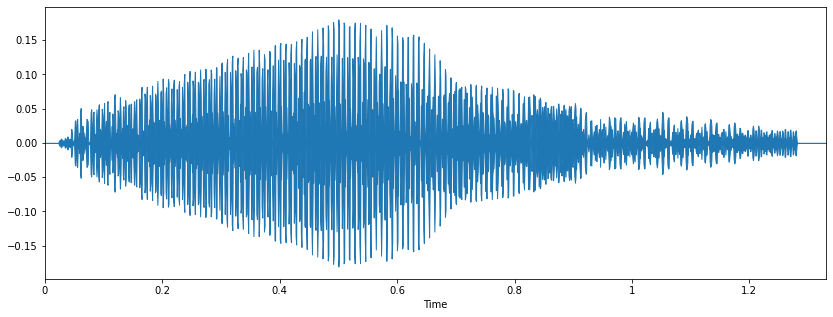

In [48]:
# Plotting the original audio file

plt.figure(figsize=(14, 5))     
librosa.display.waveplot(a, sr=sr);


# Playing the original audio file

ipd.Audio(data=a,rate=sr,autoplay=True)      #understood that we are playing back the original file here

In [49]:
# Pre-processing of the audio file if needed.


norma = a/(np.abs(a).max())   # Here we are doing Peak- normalization of the audio file
print(type(norma))

audio=torch.from_numpy(norma)   # Converting the normalized audio file from numpy to Tensor
print(type(audio))

print(audio.shape)

X = audio[:58751]    # test data
Y =audio[1:58752]   # target data
print(X.shape)    
print(Y.shape)

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
torch.Size([58752])
torch.Size([58751])
torch.Size([58751])


In [50]:
L=13 #filter length       
dilation=1 #Dilation: upsampling the filter impulse response, new filter length: (L-1)*dilation+1

In [51]:
 #Writing a function to convert the test and target data to be the kind of input Conv1d expects

def format_vector2pytorch(vector):
    
    #Function to convert a vector, like a mono audio signal, into a 3-d Tensor X that Keras expects
    #Tensor X with shape (batch, signal):
    #https://discuss.pytorch.org/t/confused-about-tensor-dimensions-and-batches/4761
    
    X = np.expand_dims(vector, axis=0)  #add batch dimension (here only 1 batch)
    X = np.expand_dims(X, axis=0)
    X=torch.from_numpy(X)
    X=X.type(torch.Tensor)     
    return X


In [52]:
# Converting the input to the type of inputs that a Convolutional layer expects by calling the function

X=format_vector2pytorch(audio[:-((L-1)*dilation+1)])      #remove last samples 
Y=format_vector2pytorch(audio[1:]) #r

print("Input X.shape=", X.shape )
print("Target Y.shape=", Y.shape)   

  

Input X.shape= torch.Size([1, 1, 58739])
Target Y.shape= torch.Size([1, 1, 58751])


In [53]:
# Defining of the PyTorch model

class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # defining network layers
        self.layer1 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=L, stride=1, dilation=dilation, padding=12, bias=False)
        
        
    def forward(self, x):
        # define forward pass          
        x = self.layer1(x)
        return x
print("Generate Model:")
model = MyNetwork()
print(model)        #dilation*(L-1)


Generate Model:
MyNetwork(
  (layer1): Conv1d(1, 1, kernel_size=(13,), stride=(1,), padding=(12,), bias=False)
)


In [54]:
# Definition of the loss function and the optimizer

n_epochs = 10000
learning_rate = 1e-4
print("Def. loss function:")   

loss_fn = nn.MSELoss()       # Defining loss function as Mean Square Error
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


Def. loss function:


In [ ]:
# Training of the model

for epoch in range(10000):
    Ypred=model(X)
    loss=loss_fn(Ypred, Y)    # Calculation of Mean Square Error
    if epoch%1==0:       
            
        optimizer.zero_grad()     # Setting the gradient to zero for every cycle
        loss.backward()         # Calculation of gradient
        optimizer.step()    # Using optimizer.step to update the values
    if epoch%1000==0:
        print(epoch, loss.item())

0 0.12149935960769653
1000 0.012042103335261345
2000 0.004896736703813076
3000 0.003974931314587593
4000 0.002861953806132078
5000 0.0017352286959066987
6000 0.0008718940080143511
7000 0.00042343593668192625
8000 0.0002889284223783761
9000 0.00026110548060387373


In [39]:
# Predictions after the model is trained

predictions=model(X)   
print(predictions)
print(predictions.shape)  # Checking its shape to see the dimensions

tensor([[[0., 0., 0.,  ..., 0., 0., 0.]]], grad_fn=<SqueezeBackward1>)
torch.Size([1, 1, 58751])


In [40]:
# Computation of the prediction errors

#mean squared predicton error:

err= sum((predictions[0,0,:]-Y[0,0,:])**2)/max(Y.shape)
print("mean squared prediction error=", err)

print(err.shape)



mean squared prediction error= tensor(8.9790e-06, grad_fn=<DivBackward0>)
torch.Size([])


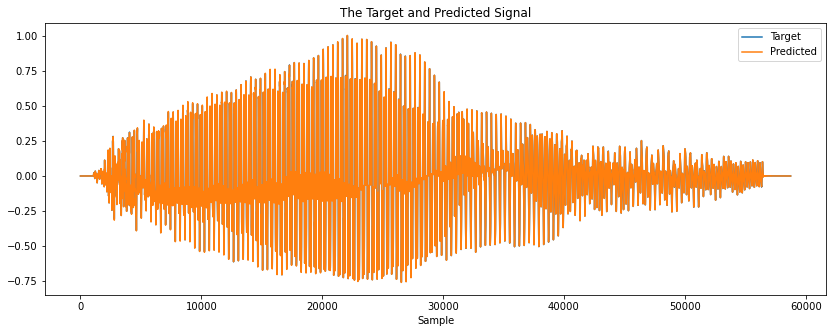

In [45]:
# Plots of the Predictions and the target 

plt.figure(figsize=(14, 5))    
plt.plot(np.array(Y[0,0,:]),)
plt.plot(predictions.detach().numpy()[0,0,:])
plt.legend(('Target','Predicted'))
plt.title('The Target and Predicted Signal')
plt.xlabel('Sample');
